In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical

from keras import models
from keras import layers

In [ ]:
keras.__version__ , tf.__version__

('2.4.3', '2.4.1')

In [ ]:
import tensorflow as tf



'2.4.1'

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

## 1. CIFAR 10 Dataset Load

In [ ]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train.shape)
print(y_train[:5])

50000
(50000, 32, 32, 3)
50000
(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]


In [ ]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test.shape)
print(y_test[:5])

10000
(10000, 32, 32, 3)
10000
(10000, 1)
[[3]
 [8]
 [8]
 [0]
 [6]]


## 2) Visualization

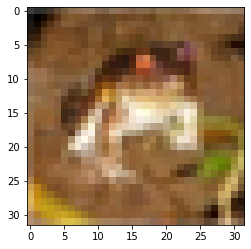

In [ ]:
digit = X_train[0]
plt.imshow(digit)
plt.show()

In [ ]:
np.set_printoptions(linewidth = 150)
print(X_train[0][0])

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


## 2. Data Preprocessing

### 1) Reshape and Normalization
- reshape
  - (50000, 32, 32, 3) to (50000, 3072)

In [ ]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

- Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
print(X_train[0])

[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]


### 2) One Hot Encoding

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 3. Keras Modeling

### 1) Model Define

- 모델 신경망 구조 정의
  - 2개의 Hidden Layers & 3968개의 Nodes

In [ ]:
CIFAR = models.Sequential()

# CIFAR.add(layers.Dense(2048, activation = 'relu' , input_shape = (32 * 32 * 3,)))
CIFAR.add(layers.Dense(1024, activation = 'relu' , input_shape = (32 * 32 * 3,)))
CIFAR.add(layers.Dense(512, activation = 'relu'))
CIFAR.add(layers.Dense(256, activation = 'relu'))
CIFAR.add(layers.Dense(128, activation = 'relu'))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
CIFAR2 = models.Sequential()

CIFAR2.add(layers.Dense(1024, activation = 'relu' , input_shape = (32 * 32 * 3,)))
CIFAR2.add(layers.Dense(1024, activation = 'relu'))
CIFAR2.add(layers.Dense(256, activation = 'relu'))
CIFAR2.add(layers.Dense(128, activation = 'relu'))
CIFAR2.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
CIFAR3 = models.Sequential()

CIFAR3.add(layers.Dense(1024, activation = 'relu' , input_shape = (32 * 32 * 3,)))
CIFAR3.add(layers.Dense(512, activation = 'relu'))
CIFAR3.add(layers.Dense(128, activation = 'relu'))
CIFAR3.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
CIFAR3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_32 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1290      
Total params: 3,738,506
Trainable params: 3,738,506
Non-trainable params: 0
_________________________________________________________________


### 2) Model Compile
- 모델 학습방법 설정

In [ ]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop' ,
              metrics = ['accuracy'])

In [ ]:
CIFAR2.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop' ,
              metrics = ['accuracy'])

In [ ]:
CIFAR3.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop' ,
              metrics = ['accuracy'])

### 3) Model Fit

In [ ]:
%%time

Hist_CIFAR1 = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 6s 9ms/step - loss: 3.1683 - accuracy: 0.1613 - val_loss: 1.9727 - val_accuracy: 0.2615
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 1.9570 - accuracy: 0.2916 - val_loss: 1.8248 - val_accuracy: 0.3414
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 1.8391 - accuracy: 0.3435 - val_loss: 1.8500 - val_accuracy: 0.3363
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 1.7463 - accuracy: 0.3709 - val_loss: 1.8867 - val_accuracy: 0.3439
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6865 - accuracy: 0.3976 - val_loss: 1.9171 - val_accuracy: 0.3228
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6389 - accuracy: 0.4123 - val_loss: 1.7948 - val_accuracy: 0.3397
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 1.5951 - accuracy: 0.4271 - val_loss: 1.7519 - val_accuracy: 0.3968

In [ ]:
Hist_CIFAR1 = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 2s 6ms/step - loss: 2.5865 - accuracy: 0.1713 - val_loss: 1.9638 - val_accuracy: 0.2804
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 1.8947 - accuracy: 0.3158 - val_loss: 1.8284 - val_accuracy: 0.3315
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 1.7840 - accuracy: 0.3581 - val_loss: 1.7264 - val_accuracy: 0.3795
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 1.7108 - accuracy: 0.3854 - val_loss: 1.7116 - val_accuracy: 0.4018
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 1.6415 - accuracy: 0.4103 - val_loss: 1.8022 - val_accuracy: 0.3566
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 1.5981 - accuracy: 0.4274 - val_loss: 1.7888 - val_accuracy: 0.3730
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 1.5510 - accuracy: 0.4461 - val_loss: 1.5562 - val_accuracy: 0.4422

In [ ]:
Hist_CIFAR2 = CIFAR2.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 2s 6ms/step - loss: 2.7427 - accuracy: 0.1743 - val_loss: 2.0560 - val_accuracy: 0.2697
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 1.9017 - accuracy: 0.3130 - val_loss: 1.9722 - val_accuracy: 0.3068
Epoch 3/100
313/313 [==============================] - 2s 6ms/step - loss: 1.7743 - accuracy: 0.3612 - val_loss: 1.8293 - val_accuracy: 0.3501
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: 1.7041 - accuracy: 0.3923 - val_loss: 1.8302 - val_accuracy: 0.3565
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 1.6482 - accuracy: 0.4114 - val_loss: 1.6742 - val_accuracy: 0.4034
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 1.5999 - accuracy: 0.4256 - val_loss: 1.6367 - val_accuracy: 0.4265
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 1.5458 - accuracy: 0.4437 - val_loss: 1.5865 - val_accuracy: 0.4308

In [ ]:
Hist_CIFAR3 = CIFAR3.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 2s 6ms/step - loss: 2.9823 - accuracy: 0.1779 - val_loss: 2.0168 - val_accuracy: 0.2455
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 1.8620 - accuracy: 0.3246 - val_loss: 1.9899 - val_accuracy: 0.3061
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 1.7514 - accuracy: 0.3709 - val_loss: 1.7035 - val_accuracy: 0.3841
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 1.6667 - accuracy: 0.4028 - val_loss: 1.6817 - val_accuracy: 0.3889
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 1.6118 - accuracy: 0.4215 - val_loss: 1.8239 - val_accuracy: 0.3583
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 1.5705 - accuracy: 0.4401 - val_loss: 1.6351 - val_accuracy: 0.4201
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 1.5266 - accuracy: 0.4546 - val_loss: 1.6189 - val_accuracy: 0.4237

### 4) 학습결과 시각화
- Loss Visualization

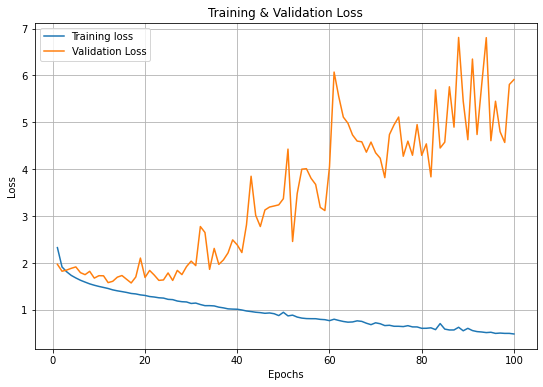

In [ ]:
epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_CIFAR.history['loss'])
plt.plot(epochs, Hist_CIFAR.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss' , 'Validation Loss'])
plt.grid()
plt.show()

### 5) Model Evaluate
- Loss & Accuracy

In [ ]:
loss, accuracy = CIFAR.evaluate(X_test, y_test)

print('Loss: {:.5f}' .format(loss))
print('Accuracy: {:.5f}' .format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 4.1481 - accuracy: 0.5066
Loss: 4.14814
Accuracy: 0.50660


In [ ]:
loss, accuracy = CIFAR.evaluate(X_test, y_test)

print('Loss: {:.5f}' .format(loss))
print('Accuracy: {:.5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 4.1185 - accuracy: 0.5014
Loss: 4.11852
Accuracy: 0.50140


In [ ]:
loss, accuracy = CIFAR2.evaluate(X_test, y_test)

print('Loss: {:.5f}' .format(loss))
print('Accuracy: {:.5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 4.2237 - accuracy: 0.4969
Loss: 4.22368
Accuracy: 0.49690


In [ ]:
loss, accuracy = CIFAR3.evaluate(X_test, y_test)

print('Loss: {:.5f}' .format(loss))
print('Accuracy: {:.5f}' .format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 4.7834 - accuracy: 0.4701
Loss: 4.78342
Accuracy: 0.47010


### 6) Model Predict
- probability

In [ ]:
np.set_printoptions(suppress = True, precision = 9)

print(CIFAR.predict(X_test[:1, :]))

[[0.000000001 0.          0.          0.9999999   0.          0.000000171 0.          0.          0.          0.00000001 ]]


- Class

In [ ]:
print(CIFAR.predict_classes(X_test[:1, :]))

[3]
